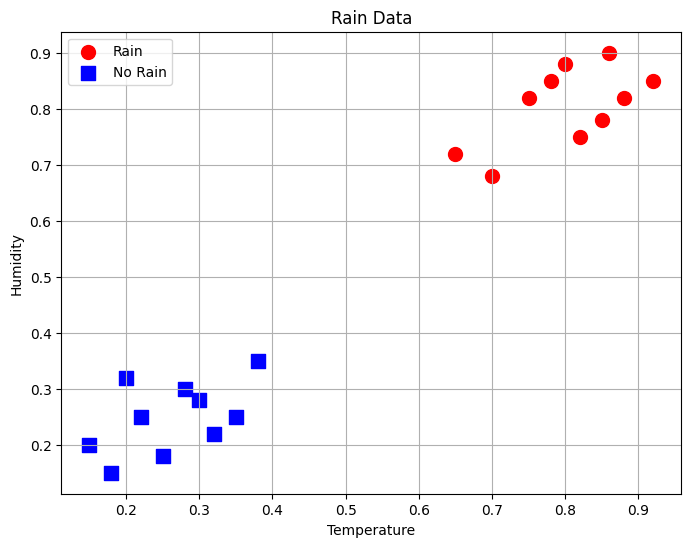

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('WeatherData_Q3.csv')

# Separate data based on the "rain" column
no_rain = df[df['rain'] == 0]
rain = df[df['rain'] == 1]

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(rain['temp'], rain['humid'],
            color='red', marker='o', s=100, label='Rain')
plt.scatter(no_rain['temp'], no_rain['humid'],
            color='blue', marker='s', s=100, label='No Rain')

# Add labels, title, and legend
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Rain Data')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
import csv
import random

# -----------------------------
# Data Loading Function (from scratch)
# -----------------------------
def load_dataset(filename):
    """
    Load CSV data assuming the header contains 'temp', 'humid', and 'rain'
    """
    dataset = []
    with open(filename, "r") as file:
        reader = csv.reader(file)
        header = next(reader)
        # Determine the indices for our required columns
        temp_idx = header.index("temp")
        humid_idx = header.index("humid")
        rain_idx = header.index("rain")
        for row in reader:
            try:
                # Convert temperature and humidity to float, rain to int
                temp = float(row[temp_idx])
                humid = float(row[humid_idx])
                rain = int(row[rain_idx])
                dataset.append([temp, humid, rain])
            except ValueError:
                # Skip any rows that don't parse correctly
                continue
    return dataset

# -----------------------------
# Perceptron Functions
# -----------------------------
def predict(row, weights):
    """Make a binary prediction with a single-layer perceptron.
       weights[0] is the bias.
    """
    activation = weights[0]  # bias term
    # For each input feature, add the weighted value
    for i in range(len(row) - 1):
        activation += weights[i + 1] * row[i]
    return 1 if activation >= 0 else 0

def train_weights(train, l_rate, n_epoch):
    """
    Train the perceptron using stochastic gradient descent.
    Updates the weights (including bias) based on each training instance.
    """
    # Initialize weights randomly between -0.5 and 0.5.
    # The number of weights equals the number of columns in the row (including label),
    # but the first weight is for the bias.
    weights = [random.uniform(-0.5, 0.5) for _ in range(len(train[0]))]
    
    for epoch in range(n_epoch):
        sum_error = 0.0
        for row in train:
            prediction = predict(row, weights)
            error = row[-1] - prediction
            sum_error += error ** 2
            # Update bias weight
            weights[0] = weights[0] + l_rate * error
            # Update the weight for each input feature
            for i in range(len(row) - 1):
                weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
        # Optionally print error for each epoch
        print(f"Epoch {epoch+1}, Sum Squared Error: {sum_error}")
        if sum_error == 0:
            print("Training converged.")
            break
    return weights

def perceptron(train, test, l_rate, n_epoch):
    """
    Train the perceptron on the training set and make predictions for the test set.
    """
    predictions = []
    weights = train_weights(train, l_rate, n_epoch)
    for row in test:
        prediction = predict(row, weights)
        predictions.append(prediction)
    return predictions, weights

# -----------------------------
# Utility Functions
# -----------------------------
def accuracy_metric(actual, predicted):
    """Compute the percentage of correct predictions."""
    correct = sum(1 for a, p in zip(actual, predicted) if a == p)
    return correct / float(len(actual)) * 100.0

def split_dataset(data, train_size):
    """
    Split the dataset into training and testing sets.
    Assumes the dataset is already shuffled or in the desired order.
    """
    train = data[:train_size]
    test = data[train_size:]
    return train, test

# -----------------------------
# Main Execution
# -----------------------------
def main():
    # Load data from CSV file (assumed to have columns 'temp', 'humid', 'rain')
    filename = "WeatherData_Q3.csv"
    data = load_dataset(filename)
    
    # Split data: first 15 instances for training, last 5 for testing
    train, test = split_dataset(data, 15)
    
    # Set hyperparameters
    learning_rate = 0.1
    max_epochs = 1000
    
    # Train the perceptron and obtain predictions for the test set
    test_predictions, weights = perceptron(train, test, learning_rate, max_epochs)
    
    # Compute accuracy for training and test sets
    train_actual = [row[-1] for row in train]
    test_actual = [row[-1] for row in test]
    train_predictions = [predict(row, weights) for row in train]
    
    train_accuracy = accuracy_metric(train_actual, train_predictions)
    test_accuracy = accuracy_metric(test_actual, test_predictions)
    
    print(f"\nFinal Weights: {weights}")
    print("Training Accuracy: {:.2f}%".format(train_accuracy))
    print("Test Accuracy: {:.2f}%".format(test_accuracy))
    
if __name__ == "__main__":
    main()


Epoch 1, Sum Squared Error: 2.0
Epoch 2, Sum Squared Error: 3.0
Epoch 3, Sum Squared Error: 3.0
Epoch 4, Sum Squared Error: 2.0
Epoch 5, Sum Squared Error: 1.0
Epoch 6, Sum Squared Error: 0.0
Training converged.

Final Weights: [-0.09850400981479848, 0.12292359802168197, 0.118834110375942]
Training Accuracy: 100.00%
Test Accuracy: 100.00%
